In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [0]:
#Loading Dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

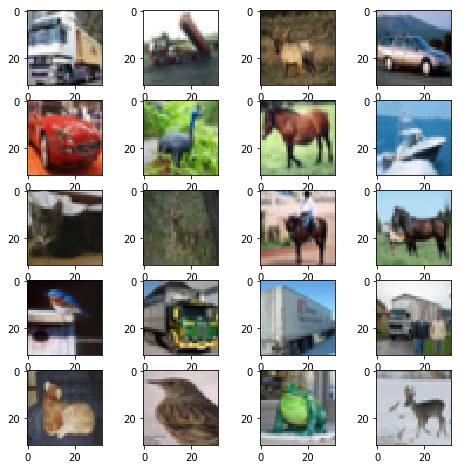

In [3]:
#Plotting initial 20 color images
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i])
plt.show()

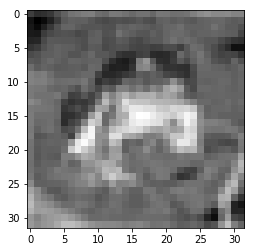

In [4]:
#converting rgb images to grayscale
x_train = np.dot(x_train[:,:,:,:], [0.299, 0.587, 0.114])
x_test = np.dot(x_test[:,:,:,:],[0.299,0.587,0.114])
plt.imshow(x_train[0],cmap='gray')

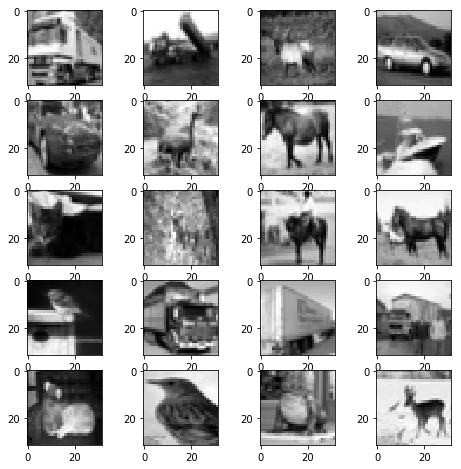

In [5]:
#Plotting Grayscale images
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i],cmap='gray')
plt.show()

In [6]:
#Normalizing Images
x_train=x_train/255.0
x_test =x_test/255.0
y_train=y_train.reshape(50000)
y_test = y_test.reshape(10000)
print(y_train.shape)

(50000,)


In [7]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
#CNN Model for classification with 32 input layer and 10 output
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,1)),
    keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = "softmax")
])

W0618 14:28:43.107496 140584045217664 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Compiling Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#Generating Multiple different types of images from train dataset
from keras.preprocessing.image import ImageDataGenerator
epochs=30
batch_size=48
x_train = x_train.reshape(x_train.shape[0],32,32,1)
x_test = x_test.reshape(x_test.shape[0],32,32,1)
train_datagen = ImageDataGenerator(rotation_range=10,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)
training_set = train_datagen.flow(x_train,y_train, batch_size=batch_size)

In [11]:
#Perform Training
history = model.fit_generator(training_set,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/30
1042/1042 [==============================] - 28s 26ms/step - loss: 1.7783 - acc: 0.3515 - val_loss: 1.3864 - val_acc: 0.5061
Epoch 2/30
1042/1042 [==============================] - 26s 25ms/step - loss: 1.4275 - acc: 0.4938 - val_loss: 1.1797 - val_acc: 0.5818
Epoch 3/30
1042/1042 [==============================] - 26s 25ms/step - loss: 1.2724 - acc: 0.5529 - val_loss: 1.1705 - val_acc: 0.5832
Epoch 4/30
1042/1042 [==============================] - 26s 25ms/step - loss: 1.1940 - acc: 0.5836 - val_loss: 1.0048 - val_acc: 0.6523
Epoch 5/30
1042/1042 [==============================] - 25s 24ms/step - loss: 1.1276 - acc: 0.6066 - val_loss: 0.9920 - val_acc: 0.6496
Epoch 6/30
1042/1042 [==============================] - 25s 24ms/step - loss: 1.0901 - acc: 0.6192 - val_loss: 0.9290 - val_acc: 0.6774
Epoch 7/30
1042/1042 [==============================] - 25s 24ms/step - loss: 1.0523 - acc: 0.6368 - val_loss: 0.8849 - val_acc: 0.6924
Epoch 8/30
1042/1042 [==========================

In [12]:
#Accuracy Evaluation
test_loss,test_acc = model.evaluate(x_test,y_test)
print('Accuracy on cross validation: ',test_acc)

10000/10000 [==============================] - 2s 162us/sample - loss: 0.7802 - acc: 0.7342
Accuracy on cross validation:  0.7342


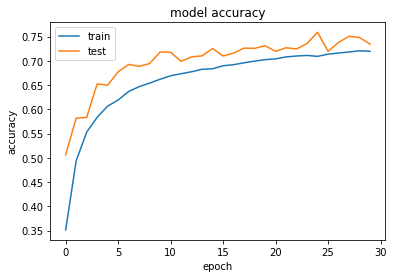

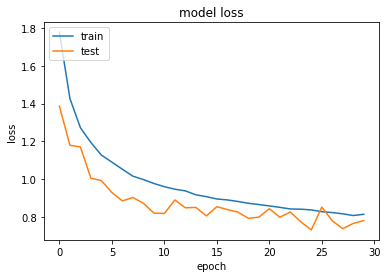

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#Saving Model
model.save('ciphar_10.h5')